<a href="https://colab.research.google.com/github/Bunnykey/PFDS/blob/master/cmp_spv_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_digits

In [2]:
X,y = load_digits(return_X_y = True)
digit = load_digits()
digit.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [3]:
digit.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [4]:
print(digit.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

Maybe digit supervised (labeled) classification?

In [5]:
digit.target

array([0, 1, 2, ..., 8, 9, 8])

In [6]:
#X = digit.data
#y = digit.target
#X, y

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

scaler = StandardScaler()
scaler.fit(X_train, y_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

# Hyperparameters
Decision Tree : min_samples_leaf, max_depth
K-nearest neighbors : n_neighbors
Random Forests : n_estimators, max_features

In [9]:
# self descriptive code
from sklearn.metrics import accuracy_score

training_accuracy = []
test_accuracy = []
leaf_settings = range(1,20)

for leaf in leaf_settings:
  treeModel = DecisionTreeClassifier(min_samples_leaf=leaf, random_state=0)
  treeModel.fit(X_train, y_train)
  y_train_hat = treeModel.predict(X_train)
  training_accuracy.append(accuracy_score(y_train, y_train_hat))
  y_test_hat = treeModel.predict(X_test)
  test_accuracy.append(accuracy_score(y_test, y_test_hat))

leaf_accuracy_check = pd.DataFrame(list(zip(leaf_settings, training_accuracy, test_accuracy)),
                                   columns = ['min_samples_leaf', 'training_accuracy', 'test_accuracy'])

leaf_accuracy_check

,min_samples_leaf,training_accuracy,test_accuracy
0,1,1.000000,0.851852
1,2,0.964996,0.829630
2,3,0.947494,0.857407
3,4,0.928401,0.859259
4,5,0.914081,0.846296
5,6,0.902944,0.837037
6,7,0.890215,0.825926
7,8,0.883850,0.825926
8,9,0.872713,0.811111
9,10,0.871122,0.811111


In [10]:
# self descriptive code
training_accuracy = []
test_accuracy = []
max_depth = [2,3,5,7,10,11,12,13,14]

for depth in max_depth:
  treeModel = DecisionTreeClassifier(max_depth=depth, random_state=0)
  treeModel.fit(X_train, y_train)
  y_train_hat = treeModel.predict(X_train)
  training_accuracy.append(accuracy_score(y_train, y_train_hat))
  y_test_hat = treeModel.predict(X_test)
  test_accuracy.append(accuracy_score(y_test, y_test_hat))

max_depth_check = pd.DataFrame(list(zip(max_depth, training_accuracy, test_accuracy)),
                                        columns = ['max_depth', 'training_accuracy', 'test_accuracy'])

max_depth_check

,max_depth,training_accuracy,test_accuracy
0,2,0.323787,0.300000
1,3,0.469372,0.475926
2,5,0.670644,0.661111
3,7,0.895784,0.816667
4,10,0.974543,0.850000
5,11,0.989658,0.851852
6,12,0.996818,0.850000
7,13,0.999204,0.855556
8,14,1.000000,0.851852


[Text(84.28901479007635, 210.192, 'X[36] <= 0.5\ngini = 0.9\nsamples = 1257\nvalue = [125, 132, 130, 129, 121, 116, 128, 124, 131, 121]'),
 Text(19.93465648854962, 195.696, 'X[42] <= 5.0\ngini = 0.554\nsamples = 195\nvalue = [123, 0, 3, 1, 6, 16, 4, 0, 3, 39]'),
 Text(8.178320610687024, 181.2, 'X[21] <= 8.0\ngini = 0.398\nsamples = 51\nvalue = [0, 0, 1, 1, 0, 11, 0, 0, 0, 38]'),
 Text(4.089160305343512, 166.704, 'X[19] <= 11.5\ngini = 0.292\nsamples = 12\nvalue = [0, 0, 1, 0, 0, 10, 0, 0, 0, 1]'),
 Text(2.044580152671756, 152.208, 'gini = 0.0\nsamples = 10\nvalue = [0, 0, 0, 0, 0, 10, 0, 0, 0, 0]'),
 Text(6.133740458015268, 152.208, 'X[52] <= 6.0\ngini = 0.5\nsamples = 2\nvalue = [0, 0, 1, 0, 0, 0, 0, 0, 0, 1]'),
 Text(4.089160305343512, 137.712, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]'),
 Text(8.178320610687024, 137.712, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]'),
 Text(12.267480916030536, 166.704, 'X[60] <= 2.0\ngini = 0.099\nsamples =

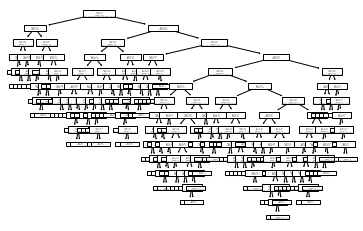

In [14]:
# to sustain the model to be un-overfitted, set max_depth as 10 and min_samples_leaf as minimum

leaf = 1
depth = 10

clf = DecisionTreeClassifier(min_samples_leaf=leaf, max_depth=depth, random_state=0)

from sklearn import tree
clf.fit(X_train, y_train)
tree.plot_tree(treeModel)

In [15]:
clf.feature_importances_

array([0.        , 0.        , 0.00889241, 0.        , 0.00488304,
       0.04474059, 0.        , 0.        , 0.        , 0.00179355,
       0.04467438, 0.        , 0.01252085, 0.01673709, 0.00255836,
       0.00268409, 0.        , 0.00092101, 0.01367564, 0.01164572,
       0.04682634, 0.10313343, 0.00214902, 0.        , 0.00182155,
       0.00538539, 0.06895999, 0.05354881, 0.00862531, 0.01256689,
       0.00214902, 0.        , 0.        , 0.05911343, 0.00171922,
       0.0050493 , 0.07615203, 0.02542966, 0.0040737 , 0.        ,
       0.        , 0.        , 0.13351442, 0.05028308, 0.00706226,
       0.00409192, 0.01066748, 0.        , 0.        , 0.        ,
       0.01008629, 0.00092101, 0.00606331, 0.00092101, 0.01746117,
       0.        , 0.        , 0.        , 0.00470376, 0.00460997,
       0.06418826, 0.0330292 , 0.0018181 , 0.00814896])

In [17]:
# Random Forest
training_accuracy = []
test_accuracy = []
n_estimators = range(2,15)

for n in n_estimators:
  forestModel = RandomForestClassifier(n_estimators=n, random_state=0)
  forestModel.fit(X_train, y_train)
  y_train_hat = forestModel.predict(X_train)
  training_accuracy.append(accuracy_score(y_train, y_train_hat))
  y_test_hat = forestModel.predict(X_test)
  test_accuracy.append(accuracy_score(y_test, y_test_hat))

estimator_check = pd.DataFrame(list(zip(n_estimators, training_accuracy, test_accuracy)),
                                        columns = ['n_estimators', 'training_accuracy', 'test_accuracy'])

estimator_check

,n_estimators,training_accuracy,test_accuracy
0,2,0.899761,0.757407
1,3,0.974543,0.842593
2,4,0.982498,0.894444
3,5,0.986476,0.911111
4,6,0.992840,0.922222
5,7,0.996818,0.929630
6,8,0.996818,0.942593
7,9,0.997613,0.946296
8,10,0.998409,0.950000
9,11,0.999204,0.955556
